<a href="https://colab.research.google.com/github/mahmud-nobe/Cluster-Membership/blob/master/NGC_2244/NGC_2244.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Necessary Packages and download the csv files

#### Importing packages

In [1]:
# import packages
import pandas as pd
import pandas_profiling as pd_prof
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for downloading file
from google.colab import files

## Use random forest to create and evaluate new model
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install astroquery

     |████████████████████████████████| 4.5MB 2.6MB/s 
     |████████████████████████████████| 2.7MB 31.2MB/s 
  Created wheel for astroquery: filename=astroquery-0.4-cp36-none-any.whl size=3582510 sha256=3bbd646d0f9b23adaa12f13c55c29ae500127c1de387d792841d2011448b56dd
  Stored in directory: /root/.cache/pip/wheels/a3/6d/9d/f6ceddc68de0e4b7a64b56d6e8c8075e6ef6377ec9c05ce128
Successfully built astroquery


In [3]:
# import astroquery
import astropy.units as u
import astropy.coordinates as coord
from astroquery.gaia import Gaia
from astroquery.vizier import Vizier


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


#### Finding GAIA Data

In [4]:
## making a GAIA cone_search of 30m radius around NGC2244 center

coordinate = coord.SkyCoord.from_name('NGC2244')
print(coordinate)
radius = u.Quantity(0.5, u.deg)
j = Gaia.cone_search_async(coordinate, radius)
r = j.get_results()
print(type(r))

<SkyCoord (ICRS): (ra, dec) in deg
    (97.97916667, 4.94166667)>
INFO: Query finished. [astroquery.utils.tap.core]
<class 'astropy.table.table.Table'>


In [5]:
## save the ASCII table as a panadas dataframe
all_stars = r.to_pandas()
all_stars

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'priam_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: TableReplaceWarning: converted column 'flame_flags' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist
0,1635721458409799680,b'Gaia DR2 3131335693444052352',3131335693444052352,659493987,2015.5,97.978172,9.967009,4.940506,5.454954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.426594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,0,38,0,11.488217,239.458542,6.685602,14.628173,3,False,0.013427,NaN,NaN,-0.308688,...,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',206.306445,-2.073384,98.373117,-18.267182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.001526
1,1635721458409799680,b'Gaia DR2 3131335693440838400',3131335693440838400,216149652,2015.5,97.980384,0.062809,4.943135,0.080662,0.161289,0.123253,1.308609,-1.794845,0.125596,0.242008,0.103372,-0.438540,0.493487,0.246715,0.312420,-0.758702,-0.449349,-0.466748,0.669478,0.462585,0.118844,123,123,117,6,10.460493,351.405518,0.000000,1.940850,31,False,377.260559,1.756390,0.017545,-0.205275,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',206.305128,-2.070216,98.375273,-18.264429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.001905
2,1635721458409799680,b'Gaia DR2 3131335693444047232',3131335693444047232,570736313,2015.5,97.981326,0.055816,4.942859,0.056805,0.626348,0.078796,7.948964,-2.129393,0.097138,-0.607344,0.085807,-0.473201,0.485140,0.101366,0.269323,-0.510178,-0.137630,-0.362503,0.521605,0.260175,-0.165336,113,113,112,1,9.321734,308.146759,0.000000,0.000000,31,False,166.407257,1.705829,0.014366,-0.287584,...,1.882213e+07,57882.206962,325.179932,6.575248,1.162213,0,0.204962,0.077064,0.127899,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',206.305806,-2.069510,98.376277,-18.264650,100001.0,8515.000000,8277.333008,8597.0,0.573,0.337,0.7991,0.295,0.1819,0.3931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002457
3,1635721458409799680,b'Gaia DR2 3131335689146178304',3131335689146178304,1314318181,2015.5,97.980179,0.073496,4.939380,0.054880,0.700612,0.110824,6.321826,-1.785018,0.112591,0.374499,0.087261,-0.454367,0.758523,0.488169,0.433483,-0.544240,-0.286180,-0.393630,0.705005,0.459420,0.153969,104,104,104,0,1.758212,125.077599,0.000000,0.000000,31,True,414.085266,1.686908,0.013566,-0.156779,...,2.143679e+05,243.291704,881.114807,11.434020,1.203961,0,0.406557,0.126457,0.280100,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',206.308368,-2.072129,98.375289,-18.268190,100001.0,7718.000000,7304.000000,7951.5,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,3.147669,2.965517,3.514609,31.673189,25.718752,37.627625,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002491
4,1635721458409799680,b'Gaia DR2 3131335689146178432',3

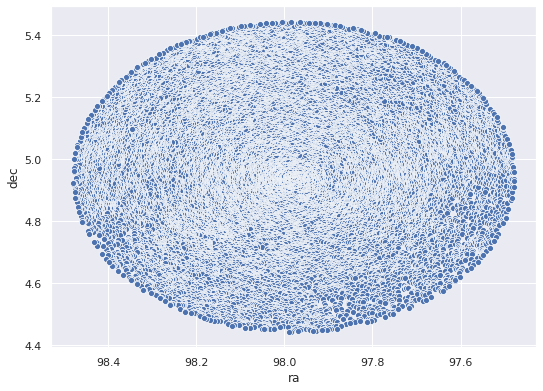

In [6]:
## plotting the skyplot 

sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(all_stars['ra'], all_stars['dec'])
skyplot.invert_xaxis()

#### Finding Cantat Data

In [7]:
#### Finding Cantat catalogue

catalog_list = Vizier.find_catalogs('Cantat')
{k:v.description for k,v in catalog_list.items()}

{'I/349': 'StarHorse, Gaia DR2 photo-astrometric distances (Anders+, 2019)',
 'J/A+A/561/A94': 'Velocities and photometry in Trumpler 20 (Donati+, 2014)',
 'J/A+A/564/A133': 'Gaia FGK benchmark stars: metallicity (Jofre+, 2014)',
 'J/A+A/569/A17': 'Gaia-ESO Survey: NGC6705 (Cantat-Gaudin+, 2014)',
 'J/A+A/582/A81': 'Gaia FGK benchmark stars: abundances (Jofre+, 2015)',
 'J/A+A/588/A120': 'Equivalent widths in 10 open clusters (Cantat-Gaudin+, 2016)',
 'J/A+A/591/A37': 'Gaia-ESO Survey. Parameters for cluster members (Jacobson+, 2016)',
 'J/A+A/597/A10': 'South Ecliptic Pole stars radial velocities (Fremat+, 2017)',
 'J/A+A/598/A68': 'Gaia-ESO Survey. Trumpler 23 (Overbeek+, 2017)',
 'J/A+A/601/A19': 'Gaia DR1 open cluster members (Gaia Collaboration+, 2017)',
 'J/A+A/603/A2': 'Gaia-ESO Survey abundances radial distribution (Magrini+, 2017)',
 'J/A+A/605/A79': 'TGAS Cepheids and RR Lyrae stars (Gaia Collaboration+, 2017)',
 'J/A+A/615/A49': 'TGAS stars membership in 128 open clusters (C

In [8]:
## cheking the tables in the GAIA DR2 paper

Vizier.ROW_LIMIT = -1
catalogs = Vizier.get_catalogs(catalog_list['J/A+A/633/A99'])
catalogs

TableList with 2 tables:
	'0:J/A+A/633/A99/table1' with 20 column(s) and 1481 row(s) 
	'1:J/A+A/633/A99/members' with 13 column(s) and 435833 row(s) 

In [0]:
## saving the whole cantat table 
## comment out the next two line if you want to save the full cantat table

# cantat_all = catalogs['J/A+A/633/A99/members'].to_pandas()
# cantat_all.to_csv('cantat_all.csv')

In [0]:
# help(Vizier)

In [11]:
## saving only NGC 2244 data from Cantat

cantat_2244 = Vizier(catalog = 'J/A+A/633/A99/members', row_limit = -1).query_constraints(Cluster="NGC_2244")
cantat_2244 = cantat_2244[0].to_pandas()
cantat_2244

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,98.315200,4.536108,3130554284272036992,0.6074,-1.835,0.051,NaN,17.322500,2.3604,0.6,b'NGC_2244',98.315208,4.536108
1,98.457159,4.534730,3130556139698030848,0.6572,-1.377,0.032,NaN,15.034100,1.6524,0.9,b'NGC_2244',98.457165,4.534730
2,98.514262,4.569089,3130558166922576512,0.8257,-1.220,0.288,NaN,16.164101,2.0843,0.7,b'NGC_2244',98.514267,4.569088
3,98.506642,4.544843,3130556582078192256,0.6101,-1.558,-0.133,NaN,17.848499,2.5816,0.5,b'NGC_2244',98.506649,4.544844
4,98.248545,4.614187,3130555830460261632,0.2582,-0.307,1.344,NaN,16.274500,1.5222,0.1,b'NGC_2244',98.248546,4.614181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,97.838267,5.516140,3131975093817653760,0.8877,-1.589,0.239,NaN,14.896100,1.0744,0.5,b'NGC_2244',97.838274,5.516139
1697,97.711034,5.528785,3131977219820275200,0.8216,-0.366,-0.363,NaN,17.707899,1.8032,0.1,b'NGC_2244',97.711036,5.528787
1698,97.914338,5.590792,3131981381649718656,0.2708,-0.357,0.033,NaN,16.165501,1.6858,0.2,b'NGC_2244',97.914339,5.590792
1699,97.787003,5.521287,3131975467473614848,0.4338,-0.547,-0.545,NaN,17.078899,1.5405,0.2,b'NGC_2244',97.787005,5.521289


In [0]:
# renaming the cantat table to match it with gaia_data
cantat_2244 = cantat_2244.rename(columns={'Source':'source_id',
                                          'Proba':'PMemb'})


In [0]:
# taking the subset of only source_id and PMemb
cantat_2244 = cantat_2244.loc[:,['source_id', 'PMemb']]


In [0]:
# join the two table on source_id
cantat_2244 = all_stars.join(cantat_2244.set_index('source_id'), on='source_id')

In [15]:
# dropping the rows, where we don't have PMemb 
# (i.e. the source id was not in the cantat table)
cantat_2244 = cantat_2244.dropna(subset=['PMemb'])
cantat_2244

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,PMemb
2,1635721458409799680,b'Gaia DR2 3131335693444047232',3131335693444047232,570736313,2015.5,97.981326,0.055816,4.942859,0.056805,0.626348,0.078796,7.948964,-2.129393,0.097138,-0.607344,0.085807,-0.473201,0.485140,0.101366,0.269323,-0.510178,-0.137630,-0.362503,0.521605,0.260175,-0.165336,113,113,112,1,9.321734,308.146759,0.000000,0.000000,31,False,166.407257,1.705829,0.014366,-0.287584,...,57882.206962,325.179932,6.575248,1.162213,0,0.204962,0.077064,0.127899,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',206.305806,-2.069510,98.376277,-18.264650,100001.0,8515.000000,8277.333008,8597.000000,0.5730,0.3370,0.7991,0.2950,0.1819,0.3931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002457,0.3
3,1635721458409799680,b'Gaia DR2 3131335689146178304',3131335689146178304,1314318181,2015.5,97.980179,0.073496,4.939380,0.054880,0.700612,0.110824,6.321826,-1.785018,0.112591,0.374499,0.087261,-0.454367,0.758523,0.488169,0.433483,-0.544240,-0.286180,-0.393630,0.705005,0.459420,0.153969,104,104,104,0,1.758212,125.077599,0.000000,0.000000,31,True,414.085266,1.686908,0.013566,-0.156779,...,243.291704,881.114807,11.434020,1.203961,0,0.406557,0.126457,0.280100,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',206.308368,-2.072129,98.375289,-18.268190,100001.0,7718.000000,7304.000000,7951.500000,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,3.147669,2.965517,3.514609,31.673189,25.718752,37.627625,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002491,0.8
4,1635721458409799680,b'Gaia DR2 3131335689146178432',3131335689146178432,1113990004,2015.5,97.978022,0.054505,4.944013,0.053738,0.719417,0.072335,9.945561,-1.792722,0.099831,0.151008,0.087104,-0.497630,0.519896,0.282432,0.008323,-0.551685,-0.340607,-0.151437,0.493580,0.199681,-0.301637,105,105,105,0,-0.781199,88.736984,0.000000,0.000000,31,True,296.403778,1.616745,0.012628,-0.256590,...,148.990063,960.594727,11.872676,1.215598,0,0.777658,0.301790,0.475868,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',206.303263,-2.071900,98.372746,-18.263690,100001.0,6078.666504,5747.250000,6812.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,3.641788,2.899894,4.073907,16.313883,14.237319,18.390446,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002617,1.0
9,1635721458409799680,b'Gaia DR2 3131336067106995456',3131336067106995456,1515459031,2015.5,97.979989,0.093496,4.946398,0.096162,0.672046,0.117175,5.735424,-1.566294,0.164868,0.460800,0.161481,0.111598,0.344430,0.600307,0.514292,-0.586456,0.182513,0.300952,0.312655,0.156973,0.259249,77,0,76,1,0.641905,78.213913,0.110444,0.522749,31,False,8.700544,1.425404,0.021043,-0.115310,...,101.461692,90.679398,14.852393,1.425420,0,1.718152,0.735584,0.982568,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',206.302049,-

In [0]:
# saving both cantat and Gaia files as csv
# if you want to save, comment out the next two lines

cantat_2244.to_csv('NGC_2244_cantat.csv')
# all_stars.to_csv('NGC_2244_Gaia_30m.csv')

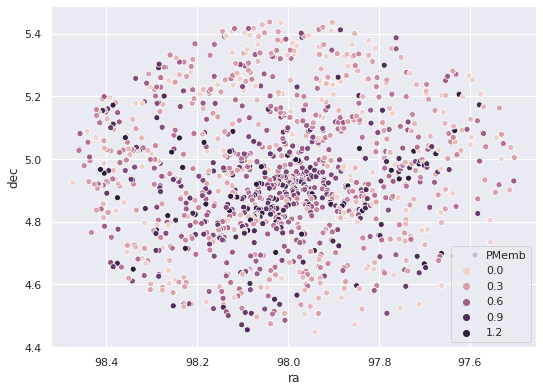

In [17]:
## plotting the skyplot 

skyplot = sns.scatterplot(cantat_2244['ra'], cantat_2244['dec'], hue = cantat_2244['PMemb'])
skyplot.invert_xaxis()

### Examining the Training Data

Separating the predictors (features) and the output (target, here PMemb) from the dataset and train the random forest model.

In [0]:
# import member dataset
member = cantat_2244

In [19]:
# Examining the descriptive statistics of each column
# (Notice BP-RP column has 9 less observation)
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb
count,1.241000e+03,1.241000e+03,1.241000e+03,1241.0,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.0,1241.000000,1241.000000,1241.000000,1241.000000,1241.00000,1241.000000,...,1233.000000,1241.000000,1.233000e+03,1233.000000,1233.000000,1233.000000,1233.000000,1241.000000,1233.000000,1233.000000,1233.000000,10.000000,10.000000,1241.000000,10.000000,10.000000,10.0,1241.000000,1241.000000,1241.000000,1241.000000,723.000000,723.000000,723.000000,723.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,387.0,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,1241.000000,1241.000000
mean,1.635721e+18,3.131418e+18,8.384301e+08,2015.5,98.017574,0.095280,4.946632,0.100889,0.549311,0.120661,6.534946,-1.360105,0.192399,0.085673,0.184564,-0.273513,0.153099,-0.055917,0.168787,-0.432715,0.008482,-0.227235,0.228172,0.163384,-0.232276,126.032232,7.728445,125.360193,0.672039,1.987698,201.628464,0.170884,3.502681,31.0,25.272943,1.450634,0.023507,-0.128011,14.38195,9.869460,...,16.901829,12.774376,7.734869e+04,279.704964,254.162338,15.302854,1.436763,0.053183,1.598951,0.668757,0.930193,64.658373,3.130251,0.038678,4850.000000,3.200000,0.0,206.319091,-2.035694,98.414024,-18.258625,100333.001383,4777.471191,4553.472168,5090.828613,1.657695,1.345851,1.970455,0.831923,0.669762,0.991636,200111.0,3.168674,2.828497,3.445691,19.717434,16.956995,22.477865,0.264639,0.499678
std,0.000000e+00,2.279627e+14,4.950372e+08,0.0,0.205997,0.052568,0.212681,0.056966,0.173086,0.068541,4.985093,0.720989,0.109004,0.690455,0.112160,0.181166,0.220084,0.272749,0.240378,0.204123,0.253260,0.250146,0.198383,0.173650,0.218138,17.152605,29.386818,17.066001,1.077452,6.106234,862.933411,0.266154,37.037213,0.0,67.636459,0.099251,0.012249,0.093607,1.91744,0.934488,...,1.872833,2.477776,7.682343e+05,2782.621548,227.820923,1.563360,0.157718,0.248366,0.485417,0.267192,0.250107,27.392842,5.332426,0.450934,474.341644,0.483046,0.0,0.215246,0.202679,0.216727,0.212100,744.634939,1039.225098,1013.091492,1054.788330,0.719129,0.723963,0.739969,0.367955,0.363932,0.383651,0.0,3.835482,3.432070,4.151287,157.486572,137.645554,177.336304,0.136933,0.274008
min,1.635721e+18,3.130529e+18,6.321380e+05,2015.5,97.502184,0.022067,4.448611,0.021757,0.250001,0.025800,0.645445,-3.448733,0.043631,-1.780996,0.038007,-0.967075,-0.653522,-0.900410,-0.920227,-0.866931,-0.943199,-0.939732,-0.501542,-0

In [20]:
# correlation of PMemb with other variables
member.corr().PMemb.dropna().sort_values()

rv_template_teff        -0.469716
rv_template_logg        -0.436976
dist                    -0.332617
pmra                    -0.296770
phot_rp_mean_mag        -0.216307
                           ...   
astrometric_weight_al    0.195597
parallax_over_error      0.236957
parallax                 0.272885
radial_velocity          0.340237
PMemb                    1.000000
Name: PMemb, Length: 88, dtype: float64

In [0]:
### adding their distance from the center of the clusters

## NGC 2244
center = coord.SkyCoord.from_name('NGC2244')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (member['ra'] - center_ra)**2 + (member['dec'] - center_dec)**2 )
member['dist_2244_center'] = distance

In [0]:
# Choosing the predictors
# Usual Parameters

feature_columns = ['ra', 'dec', 'ra_error', 'dec_error', 
                   'parallax', 'parallax_error', 'parallax_over_error',
                   'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
                   'phot_g_mean_mag', 'bp_rp', 'dist_2244_center']

features = member.loc[:,feature_columns]
targets = member['PMemb']

In [23]:
# Dropping the NULL values from the using training set
# adding features and targets in a training set
training_set = pd.concat((features, targets), axis=1)

# dropping NA
training_set = training_set.dropna()

# finding where dtype is float64 as the built-in radom forest package 
# don't take 64-bit-float
float64_data = np.where(training_set.dtypes == 'float64')[0] 

# change the data type to float32 from float64
training_set.iloc[:, float64_data] = training_set.iloc[:, float64_data].astype('float32')


# set features, targets again
features, targets = training_set.iloc[:,:-1], training_set.iloc[:,-1]

features.describe()

,ra,dec,ra_error,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,bp_rp,dist_2244_center
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,98.018600,4.946507,0.095190,0.100742,0.549320,0.120473,6.546521,-1.360496,0.192247,0.084103,0.184402,16.233072,1.598951,0.265742
std,0.205902,0.213287,0.052466,0.056786,0.173170,0.068414,4.995027,0.721658,0.108948,0.690676,0.112144,1.749073,0.485417,0.137089
min,97.502182,4.448611,0.022067,0.021757,0.250001,0.025800,0.645445,-3.448733,0.043631,-1.780996,0.038007,6.703146,0.204962,0.002467
25%,97.885574,4.807755,0.053300,0.055005,0.406430,0.065900,2.965295,-1.839515,0.105167,-0.344179,0.097678,15.602446,1.329817,0.151147
50%,98.012962,4.933580,0.089431,0.094488,0.552751,0.111176,4.813920,-1.481409,0.180378,0.093743,0.174934,16.776360,1.601355,0.268236
75%,98.154091,5.088374,0.126394,0.133290,0.665432,0.159937,8.655560,-0.820759,0.256883,0.505674,0.237744,17.488062,1.959696,0.388477
max,98.473640,5.436892,0.573311,0.556319,1.004183,0.586892,30.638092,0.182400,1.107204,2.078215,0.992456,17.999603,3.015408,0.499797


In [0]:
# Profile report of the full training_set
# pd_prof.ProfileReport(training_set)

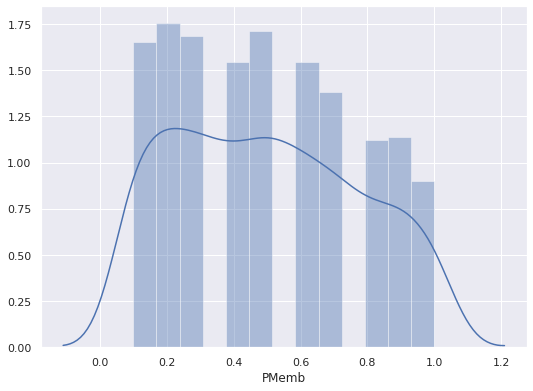

In [25]:
# histogram of PMemb in the training data
sns.distplot(training_set['PMemb'])
plt.show()

In [26]:
# Probable members (PMemb >= 0.5) in this dataset
len(training_set[training_set['PMemb'] >= 0.5])

666

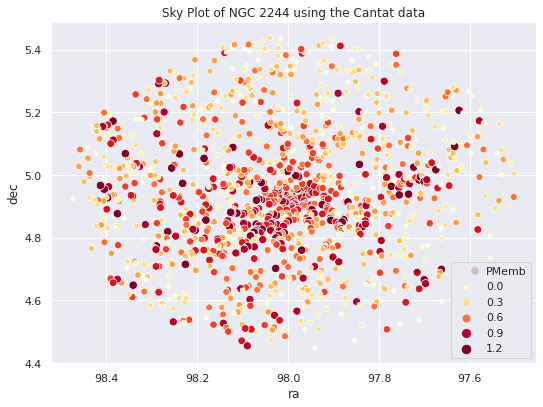

In [27]:
sns.set(rc={'figure.figsize':(8.7,6.27)})

skyplot = sns.scatterplot(x = 'ra', y='dec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
skyplot.invert_xaxis()
plt.title('Sky Plot of NGC 2244 using the Cantat data')
plt.show()

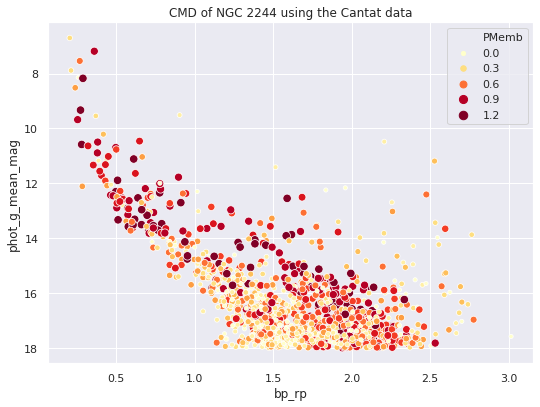

In [28]:
# CMD marked with the membership probabilities of the stars 
# (PMemb >= 0.5 stars are the probable stars)
cmd = sns.scatterplot(x = 'bp_rp', y='phot_g_mean_mag', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
cmd.invert_yaxis()
plt.title('CMD of NGC 2244 using the Cantat data')
plt.show()

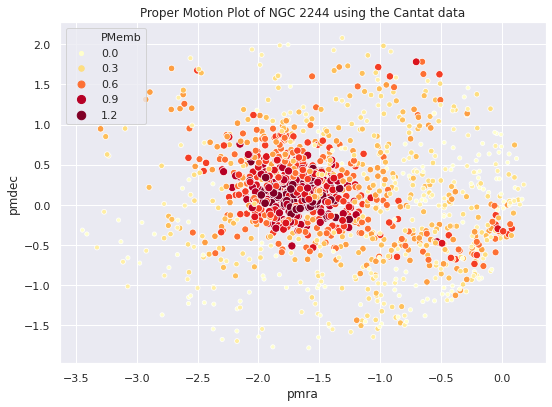

In [29]:
# proper motion plot marked with the membership probabilities of the stars 

pm_plot = sns.scatterplot(x = 'pmra', y='pmdec', hue='PMemb', palette='YlOrRd', size = 'PMemb', data = training_set)
plt.title('Proper Motion Plot of NGC 2244 using the Cantat data')
plt.show()

In [30]:
# Use Random Forest on whole dataset using 100 different trees 
rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [31]:
# checking the feature importance, 
# ( this is higher for a variable if the model efficiency become lower as we remove that variable)
feature_imp = pd.Series(rfr.feature_importances_, index=features.columns).sort_values(ascending = False)
feature_imp

pmdec                  0.380574
pmra                   0.346642
parallax               0.040011
dist_2244_center       0.037451
dec                    0.026649
bp_rp                  0.025789
ra                     0.024016
pmdec_error            0.020385
phot_g_mean_mag        0.019932
parallax_over_error    0.019827
ra_error               0.017819
pmra_error             0.017048
parallax_error         0.012228
dec_error              0.011629
dtype: float64

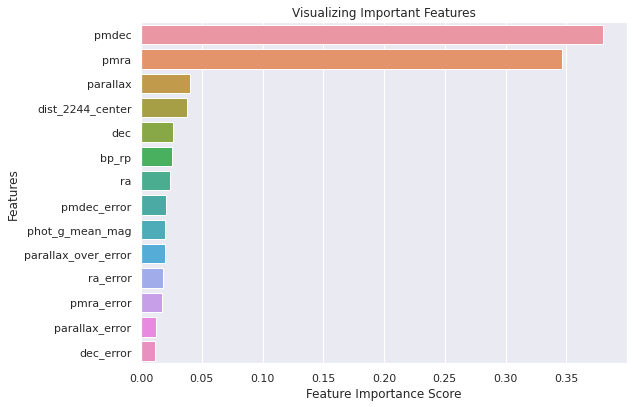

In [32]:
# plotting as a barplot

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

### Estimating the Model Accuracy in Test Data

In [0]:
# function for splitting a given dataset into training and test dataset

import random
# X = predictors, Y = target
def test_train_split(X, Y, test_ratio):
  ntest = int(len(X)*test_ratio) 
  ntrain = int(len(X) - ntest)

  # randomly select ntest number of rows from the full dataset as test_index and mark others as train_index.
  ind_test = random.sample(range(len(X)), k = ntest)
  ind_train = list(set(range(len(X))) - set(ind_test))

  # test and train dataset has the observations of test_indices and train_indices respectively
  test_X = X.iloc[ind_test]
  test_Y = Y.iloc[ind_test]

  train_X = X.iloc[ind_train]
  train_Y = Y.iloc[ind_train]

  return test_X, test_Y, train_X, train_Y

In [0]:
# splitting our dataset using 0.3 test ratio (30% test data, 70% train data)
test_features, test_targets, train_features, train_targets = test_train_split(features, targets, 0.3)


In [35]:
# train the model using only training subset
rfr.fit(train_features, train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
# find the accuracy rate to predict the outcome for test subset
test_predict = rfr.predict(test_features)
rfr.score(test_features, test_targets)

0.6937808784740984

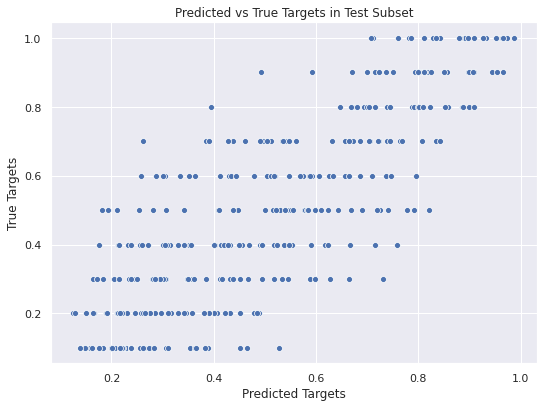

In [37]:
# plot Predicted vs True Targets in Test Subset

sns.scatterplot(test_predict, test_targets)
plt.title('Predicted vs True Targets in Test Subset')
plt.ylabel('True Targets')
plt.xlabel('Predicted Targets')
plt.show()

In [38]:
# Check with different test ratio

test_ratio = np.linspace(0.95, 0.05, 19)
print(test_ratio)

[0.95 0.9  0.85 0.8  0.75 0.7  0.65 0.6  0.55 0.5  0.45 0.4  0.35 0.3
 0.25 0.2  0.15 0.1  0.05]


In [39]:
# for each test_ratio, estimate the accuracy of the model

accuracy_rate = []

rfr = RandomForestRegressor(n_estimators = 100, oob_score = True)

for ratio in test_ratio:
  
  accuracy = 0
  for iter in range(20):
    test_features, test_targets, train_features, train_targets = test_train_split(features, targets, ratio)

    # train the model using only training subset
    rfr.fit(train_features, train_targets)

    # find the accuracy rate to predict the outcome for test subset
    test_predict = rfr.predict(test_features)
    accuracy += rfr.score(test_features, test_targets)

  accuracy_rate.append(accuracy/20)

print(accuracy_rate)

[0.4190924918254783, 0.5316349696074585, 0.5972130047473464, 0.6034718227429454, 0.6468043554046179, 0.6597669295238949, 0.6664910931550967, 0.6720348330368598, 0.684603947401129, 0.6806359760266482, 0.6880877372267464, 0.6946737523333664, 0.6875929318928155, 0.7021675057545627, 0.7042819568002102, 0.7161333640895988, 0.6995093105364893, 0.7053622618517872, 0.6968630264997385]


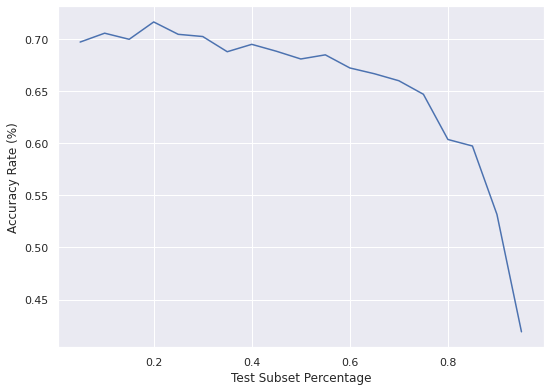

In [40]:
# plotting the accuracy rate vs test-ratio

sns.lineplot(test_ratio, accuracy_rate)
plt.xlabel('Test Subset Percentage')
plt.ylabel('Accuracy Rate (%)')
plt.show()

### Prediction of PMemb for the new stars

In [41]:
# descriptive stats
all_stars.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist
count,2.713100e+04,2.713100e+04,2.713100e+04,27131.0,27131.000000,27131.000000,27131.000000,27131.000000,22426.000000,22426.000000,22426.000000,22426.000000,22426.000000,22426.000000,22426.000000,27131.000000,22426.000000,22426.000000,22426.000000,22426.000000,22426.000000,22426.000000,22426.000000,22426.000000,22426.000000,27131.000000,27131.000000,27131.000000,27131.000000,27131.000000,27131.000000,27131.000000,27131.000000,27131.000000,27131.000000,22331.000000,22331.000000,27131.000000,27131.000000,27131.000000,...,24054.000000,24054.000000,27131.000000,2.405200e+04,24052.000000,24052.000000,24052.000000,24051.000000,27131.000000,24051.000000,24054.000000,24052.000000,136.000000,136.000000,27131.000000,136.000000,136.000000,136.000000,27131.000000,27131.000000,27131.000000,27131.000000,3827.000000,3827.000000,3827.000000,3827.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,1848.000000,2135.0,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,2135.000000,27131.000000
mean,1.635721e+18,3.131451e+18,8.505302e+08,2015.5,97.994674,1.433756,4.976927,1.504025,0.489897,0.565300,3.388452,-0.101958,0.891052,-1.464442,0.906277,-0.336764,0.063394,-0.115407,0.192226,-0.400478,0.063955,-0.249736,0.169482,0.185360,-0.268376,111.967270,1.462202,111.375659,0.591611,2.307858,355.650574,0.937813,12.055289,26.144300,5.176416,1.393719,0.112024,-0.175345,12.880211,9.033946,...,57.184929,18.812366,10.187277,1.533987e+04,95.058152,112.901627,17.330250,2.420710,0.072795,1.482090,0.091522,1.390493,34.613869,2.443073,0.022262,5215.073730,3.290441,-0.079044,206.281657,-2.041964,98.388175,-18.229674,101045.238045,4699.212891,4482.101074,5016.929199,1.088544,0.851874,1.361616,0.542529,0.422414,0.680026,200111.0,2.252152,2.007350,2.430402,7.334236,6.363113,8.305358,0.305262
std,0.000000e+00,2.320001e+14,4.875269e+08,0.0,0.230431,3.456977,0.234116,3.613866,1.003673,0.483336,9.491921,3.717788,0.726289,4.473964,0.772567,0.315935,0.241995,0.285023,0.284617,0.228933,0.259270,0.254799,0.263839,0.221556,0.222036,27.914175,13.329616,27.792960,1.009776,9.454286,6633.310547,1.479147,317.461116,10.601223,30.875668,0.171709,0.089105,0.144602,3.074494,1.685651,...,119.198410,1.493534,4.533381,5.804573e+05,5666.730722,182.099075,1.484909,0.985541,0.342000,0.404058,0.595902,0.395898,31.617558,3.462737,0.338714,673.694031,0.645655,0.315791,0.235574,0.228221,0.242060,0.233776,4416.328272,800.626221,803.110107,807.669434,0.805725,0.770326,0.844745,0.405400,0.384650,0.429523,0.0,3.360054,2.967759,3.659140,70.504425,61.812954,79.213554,0.125721
min,1.635721e+18,3.130529e+18,2.645540e+05,2015.5,97.477830,0.019653,4.442143,0.019218,-13.217305,0.021

In [0]:
### adding their distance from the center of the clusters

## NGC 2244
center = coord.SkyCoord.from_name('NGC2244')
center_ra, center_dec = center.ra.degree, center.dec.degree
distance = np.sqrt( (all_stars['ra'] - center_ra)**2 + (all_stars['dec'] - center_dec)**2 )
all_stars['dist_2244_center'] = distance

In [0]:
all_stars = all_stars.dropna(subset = feature_columns)

In [0]:
# select the set of predictor variables from the new dataset
new_features = all_stars.loc[:, feature_columns]
new_features = new_features.astype('float32')

In [45]:
# train the model again using all the features and targets of the previous dataset
rfr.fit(features, targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [46]:
# estimate the membership probability of the stars
all_stars['PMemb'] = rfr.predict(new_features)
sum(all_stars['PMemb'] >= 0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1273

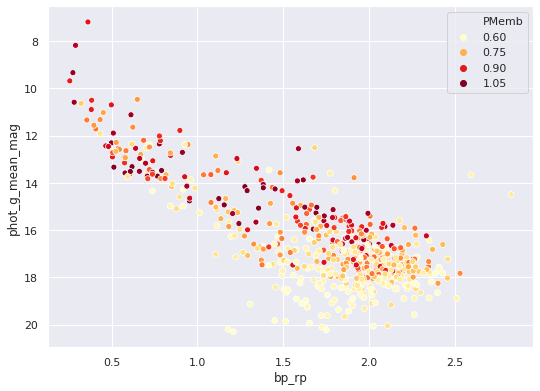

In [47]:
# CMD of probable members 

cmd = sns.scatterplot(x = 'bp_rp', y = 'phot_g_mean_mag', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.6] )
cmd.invert_yaxis()

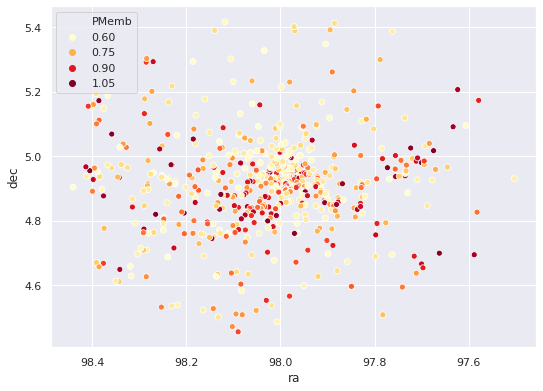

In [48]:
skyplot = sns.scatterplot(x = 'ra', y = 'dec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.6] )
skyplot.invert_xaxis()

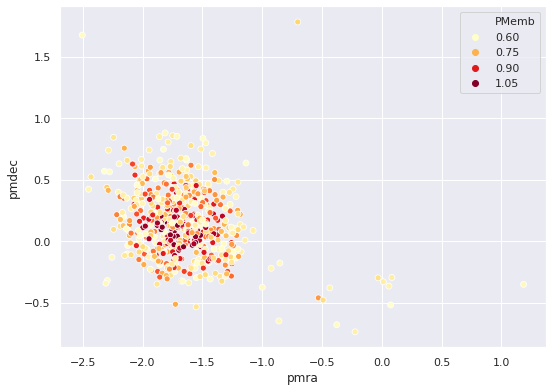

In [49]:
# pm plot
sns.scatterplot(x = 'pmra', y = 'pmdec', hue= 'PMemb', 
                      palette='YlOrRd', data = all_stars[all_stars['PMemb'] >= 0.6] )

In [50]:
potentialMember = all_stars[all_stars['PMemb'] >= 0.6]
len(potentialMember)

571

In [51]:
potentialMember.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,dist_2244_center,PMemb
count,5.710000e+02,5.710000e+02,5.710000e+02,571.0,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.0,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,5.710000e+02,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,1.000000,1.000000,571.000000,1.0,1.0,1.0,571.000000,571.000000,571.000000,571.000000,307.000000,307.000000,307.000000,307.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,188.0,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,571.000000,571.000000,571.000000
mean,1.635721e+18,3.131369e+18,8.425439e+08,2015.5,98.032216,0.125654,4.910428,0.145791,0.627979,0.183909,6.710710,-1.663304,0.251415,0.149447,0.241264,-0.296650,0.210677,0.010634,0.157510,-0.491112,-0.056427,-0.200459,0.255784,0.198271,-0.226452,121.957968,10.362522,121.334501,0.623468,1.621592,148.659760,0.234458,1.257568,31.0,33.842014,1.419776,0.031315,-0.155486,13.919440,9.677758,...,12.425569,6.322307e+04,202.031415,220.163330,15.359858,1.535569,0.045534,1.675669,0.669355,1.006313,73.062317,1.438334,0.003503,4500.0,3.0,0.0,206.357974,-2.039452,98.431581,-18.293960,100470.107492,4892.030762,4660.369141,5224.029785,1.676464,1.353534,2.025107,0.847369,0.674468,1.022888,200111.0,3.051073,2.726326,3.320304,26.336229,22.905581,29.766872,0.197565,0.197980,0.754450
std,0.000000e+00,1.965792e+14,4.902047e+08,0.0,0.172523,0.118846,0.156061,0.163893,0.337713,0.209179,5.943047,0.354905,0.236024,0.290319,0.230475,0.175016,0.219210,0.255264,0.218557,0.209415,0.244176,0.221089,0.215436,0.169678,0.215146,17.454251,33.077738,17.394752,1.019155,2.937481,74.780731,0.364805,3.377569,0.0,78.729568,0.133761,0.030571,0.093889,1.943182,1.009349,...,2.395019,5.995031e+05,1943.655416,251.423706,1.786062,0.315206,0.208655,0.528755,0.297458,0.328152,NaN,NaN,0.083697,NaN,NaN,NaN,0.162817,0.165604,0.181414,0.155661,1172.190051,1216.866211,1180.394897,1258.556763,0.781462,0.753653,0.826116,0.400688,0.383392,0.429714,0.0,2.642563,2.492230,2.809710,221.796097,193.972504,249.622330,0.136285,0.136570,0.118699
min,1.635721e+18,3.130529e+18,4.354876e+06,2015.5,97.503467,0.022067,4.454919,0.021757,-1.132716,0.026637,-4.519591,-2.503791,0.043631,-0.736274,0.038007,-0.967075,-0.653522,-0.900410,-0.908446,-0.874889,-0.901114,-0.939732,-0.434475,-0.625654,-0.957245,68.000000,0.000000,66.000000,0.000000,-5.374730,46.321133,0.000000,0.000000,31.0,0.027

In [52]:
member.describe()

,solution_id,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,...,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,dist,PMemb,dist_2244_center
count,1.241000e+03,1.241000e+03,1.241000e+03,1241.0,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.0,1241.000000,1241.000000,1241.000000,1241.000000,1241.00000,1241.000000,...,1241.000000,1.233000e+03,1233.000000,1233.000000,1233.000000,1233.000000,1241.000000,1233.000000,1233.000000,1233.000000,10.000000,10.000000,1241.000000,10.000000,10.000000,10.0,1241.000000,1241.000000,1241.000000,1241.000000,723.000000,723.000000,723.000000,723.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,387.0,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,1241.000000,1241.000000,1241.000000
mean,1.635721e+18,3.131418e+18,8.384301e+08,2015.5,98.017574,0.095280,4.946632,0.100889,0.549311,0.120661,6.534946,-1.360105,0.192399,0.085673,0.184564,-0.273513,0.153099,-0.055917,0.168787,-0.432715,0.008482,-0.227235,0.228172,0.163384,-0.232276,126.032232,7.728445,125.360193,0.672039,1.987698,201.628464,0.170884,3.502681,31.0,25.272943,1.450634,0.023507,-0.128011,14.38195,9.869460,...,12.774376,7.734869e+04,279.704964,254.162338,15.302854,1.436763,0.053183,1.598951,0.668757,0.930193,64.658373,3.130251,0.038678,4850.000000,3.200000,0.0,206.319091,-2.035694,98.414024,-18.258625,100333.001383,4777.471191,4553.472168,5090.828613,1.657695,1.345851,1.970455,0.831923,0.669762,0.991636,200111.0,3.168674,2.828497,3.445691,19.717434,16.956995,22.477865,0.264639,0.499678,0.265129
std,0.000000e+00,2.279627e+14,4.950372e+08,0.0,0.205997,0.052568,0.212681,0.056966,0.173086,0.068541,4.985093,0.720989,0.109004,0.690455,0.112160,0.181166,0.220084,0.272749,0.240378,0.204123,0.253260,0.250146,0.198383,0.173650,0.218138,17.152605,29.386818,17.066001,1.077452,6.106234,862.933411,0.266154,37.037213,0.0,67.636459,0.099251,0.012249,0.093607,1.91744,0.934488,...,2.477776,7.682343e+05,2782.621548,227.820923,1.563360,0.157718,0.248366,0.485417,0.267192,0.250107,27.392842,5.332426,0.450934,474.341644,0.483046,0.0,0.215246,0.202679,0.216727,0.212100,744.634939,1039.225098,1013.091492,1054.788330,0.719129,0.723963,0.739969,0.367955,0.363932,0.383651,0.0,3.835482,3.432070,4.151287,157.486572,137.645554,177.336304,0.136933,0.274008,0.137181
min,1.635721e+18,3.130529e+18,6.321380e+05,2015.5,97.502184,0.022067,4.448611,0.021757,0.250001,0.025800,0.645445,-3.448733,0.043631,-1.780996,0.038007,-0.967075,-0.653522,-0.900410,-0.920227,-0.866931,-0.943199,-0.939732,-0.501542,-0.

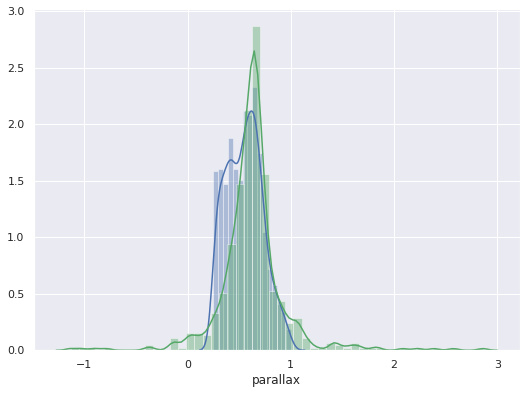

In [53]:
sns.distplot(member['parallax'], color = 'b')
sns.distplot(potentialMember['parallax'], color = 'g')

In [0]:
# saving the files as csv

# all_stars.to_csv('gaia_2244_membership_prob.csv')
potentialMember.to_csv('NGC_2244_membership_prob.csv')


### Comparing the new and old probable members

In [0]:
# creating subset for the potential member in previous dataset

potential_Old_Member = member[member['PMemb'] >= 0.5]


concatenated = pd.concat([potentialMember.assign(dataset='New_member'), potential_Old_Member.assign(dataset='Old_member')])


In [56]:
concatenated

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,...,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,dist,dist_2244_center,PMemb,dataset
3,1635721458409799680,b'Gaia DR2 3131335689146178304',3131335689146178304,1314318181,2015.5,97.980179,0.073496,4.939380,0.054880,0.700612,0.110824,6.321826,-1.785018,0.112591,0.374499,0.087261,-0.454367,0.758523,0.488169,0.433483,-0.544240,-0.286180,-0.393630,0.705005,0.459420,0.153969,104,104,104,0,1.758212,125.077599,0.000000,0.000000,31,True,414.085266,1.686908,0.013566,-0.156779,...,11.434020,1.203961,0,0.406557,0.126457,0.280100,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',206.308368,-2.072129,98.375289,-18.268190,100001.0,7718.000000,7304.000000,7951.500000,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,3.147669,2.965517,3.514609,31.673189,25.718752,37.627625,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002491,0.002501,0.816,New_member
4,1635721458409799680,b'Gaia DR2 3131335689146178432',3131335689146178432,1113990004,2015.5,97.978022,0.054505,4.944013,0.053738,0.719417,0.072335,9.945561,-1.792722,0.099831,0.151008,0.087104,-0.497630,0.519896,0.282432,0.008323,-0.551685,-0.340607,-0.151437,0.493580,0.199681,-0.301637,105,105,105,0,-0.781199,88.736984,0.000000,0.000000,31,True,296.403778,1.616745,0.012628,-0.256590,...,11.872676,1.215598,0,0.777658,0.301790,0.475868,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',206.303263,-2.071900,98.372746,-18.263690,100001.0,6078.666504,5747.250000,6812.000000,NaN,NaN,NaN,NaN,NaN,NaN,200111.0,3.641788,2.899894,4.073907,16.313883,14.237319,18.390446,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.002617,0.002610,0.985,New_member
9,1635721458409799680,b'Gaia DR2 3131336067106995456',3131336067106995456,1515459031,2015.5,97.979989,0.093496,4.946398,0.096162,0.672046,0.117175,5.735424,-1.566294,0.164868,0.460800,0.161481,0.111598,0.344430,0.600307,0.514292,-0.586456,0.182513,0.300952,0.312655,0.156973,0.259249,77,0,76,1,0.641905,78.213913,0.110444,0.522749,31,False,8.700544,1.425404,0.021043,-0.115310,...,14.852393,1.425420,0,1.718152,0.735584,0.982568,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',206.302049,-2.069061,98.374660,-18.261194,102001.0,4132.000000,3928.000000,4292.007324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b'https://gea.esac.esa.int/data-server/datalin...,b'',0.004807,0.004803,0.756,New_member
10,1635721458409799680,b'Gaia DR2 3131335693444048256',3131335693444048256,1153766790,2015.5,97.977011,0.083526,4.946443,0.103496,0.649235,0.140889,4.608147,-1.565165,0.168037,0.424823,0.170430,-0.433304,0.434662,0.215358,0.080596,-0.677564,-0.394316,-0.220967,0.519687,0.327144,-0.191045,96,0,96,0,0.566827,98.160240,0.136729,0.495088,31,False,4.311157,1.368564,0.024504,-0.213995,...,15.430652,1.541240,0,1.786717,0.701834,1.084884,NaN,NaN,0,NaN,NaN,NaN,b'NOT_AVAILABLE',206.300640,-2.071673,98.371538,-18.261323,102001.0,4303.333496,3928.000000,4475.860352

In [57]:
concatenated.dataset.value_counts()

Old_member    671
New_member    571
Name: dataset, dtype: int64

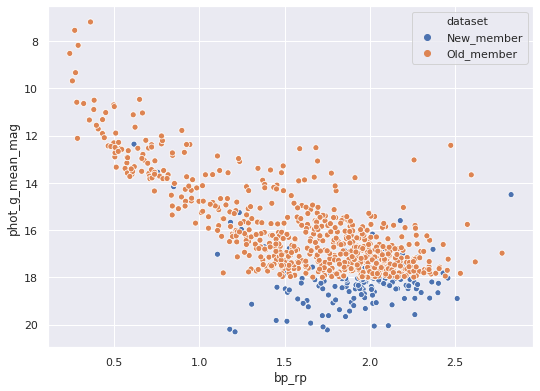

In [58]:
cmd = sns.scatterplot(x='bp_rp', y='phot_g_mean_mag', data=concatenated,
                hue='dataset')
cmd.invert_yaxis()

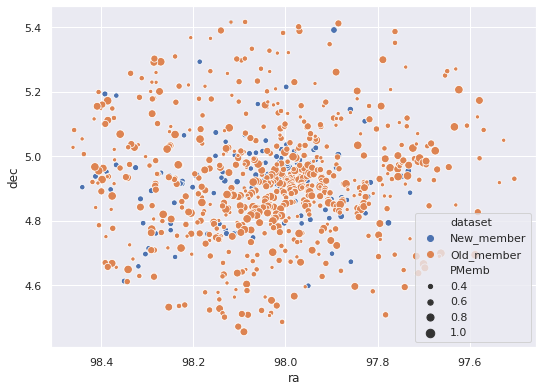

In [59]:
skyplot = sns.scatterplot(x='ra', y='dec', data=concatenated,
                size='PMemb', hue='dataset')
skyplot.invert_xaxis()

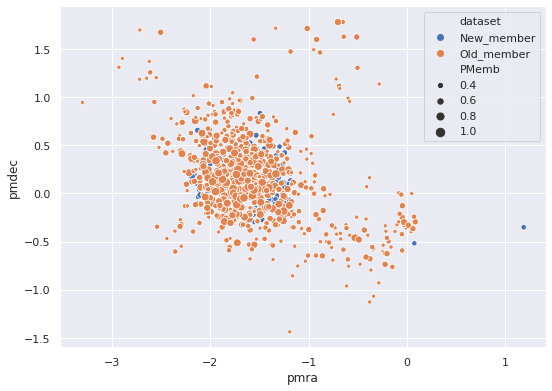

In [60]:
# proper motion plot

sns.scatterplot(x='pmra', y='pmdec', data=concatenated,
                size='PMemb', hue='dataset')

In [0]:
# pd_prof.ProfileReport(potentialMember)

In [0]:
import time
time.sleep(150)

In [0]:
files.download('NGC_2244_cantat.csv')
files.download('NGC_2244_membership_prob.csv')